In [1]:
import datetime

import numpy as np 
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns

import particle_filter

In [2]:
ts = web.DataReader("6089.JP", "stooq")

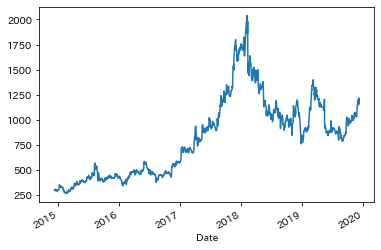

In [3]:
ts["Open"].plot()

In [4]:
diff_open = ts["Open"].diff()

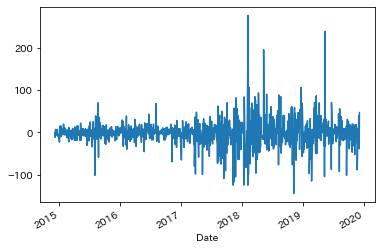

In [5]:
diff_open.plot()

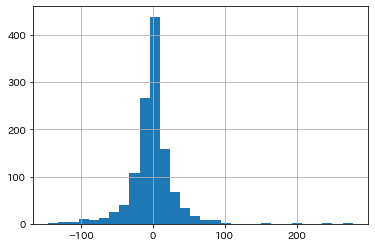

In [6]:
diff_open.hist(bins=30)

In [113]:
np_open = np.log(ts["Open"])

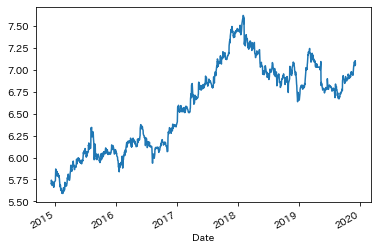

In [114]:
np_open.plot()

### local model
- x<sub>t</sub> = x<sub>t-1 </sub> + mu  mu: N(0, sigma<sub>x</sub>)
- y<sub>t</sub> = x<sub>t</sub> + nu nu: N(0, sigma<sub>y</sub>)

In [115]:
p_f = particle_filter.ParticalFilter(
    observed=np_open[::-1],
    n_particles=50,
    num = 10)

update alpha: 0.1, beta: 0.4717005961039414
2293.011700060333
update alpha: 0.1, beta: 0.3358778579704604
2294.189755574869


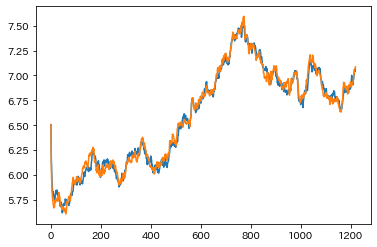

In [116]:
alpha, beta, Particles = p_f.calc()

In [117]:
df = pd.DataFrame(np_open)

In [118]:
df["particle"] = np.mean(Particles, axis=0)[::-1]

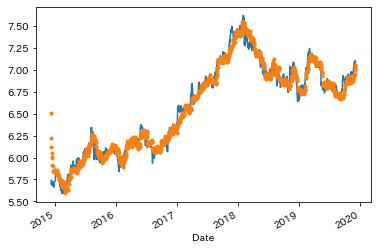

In [119]:
df["Open"].plot()
df["particle"].plot(marker=".", linestyle="None")

### 計算方法

In [19]:
# 条件として、以下と仮定する.
n = 5  # 粒子数
x = np.random.rand(n)  # 状態（仮）
print(f"状態: {x}")
likelihood = np.random.rand(n)  # 尤度（仮）
print(f"尤度: {likelihood}")

状態: [0.81697495 0.46347679 0.23909362 0.53441379 0.08986006]
尤度: [0.06844623 0.48470826 0.52769835 0.8352202  0.08735019]


In [20]:
s_likelihood = likelihood/sum(likelihood)
print(f"正規化した尤度: {s_likelihood}")
cum_likelihood = np.cumsum(s_likelihood)
print(f"正規化した尤度の累積和: {cum_likelihood}")
start = np.random.random()/n
print(f"リサンプルの初期位置: {start}")

正規化した尤度: [0.03416464 0.24194002 0.26339834 0.41689654 0.04360047]
正規化した尤度の累積和: [0.03416464 0.27610466 0.539503   0.95639953 1.        ]
リサンプルの初期位置: 0.198379012714263


In [21]:
# resample
particles = []
for index in range(n):
    while start < cum_likelihood[index]:
        particles.append(x[index])
        start += 1/n

In [22]:
print(f"リサンプル後の粒子の状態: {particles}")

リサンプル後の粒子の状態: [0.46347679247420326, 0.23909361561797082, 0.5344137889448051, 0.5344137889448051, 0.08986005736040104]


In [23]:
x_t = np.random.rand(n)  # 状態（仮）
y_t = np.random.rand() 
sigma = -1

In [24]:
np.exp(- (y_t - x_t)**2 / (2 * sigma)) / (2 * np.pi * sigma)**0.5

array([3.24161018e-17-0.52939512j, 2.51044513e-17-0.4099868j ,
       2.91779976e-17-0.47651286j, 2.72924934e-17-0.44572024j,
       2.46078014e-17-0.40187589j])

In [123]:
np.sum(np.array([1,2,3, np.nan]), )

nan